In [21]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

def sorted_df(loc, qps):
    df = pd.read_csv(loc, sep=' ')
    df = df[df['joules']>0]
    df = df[df['target_QPS'] == qps]
    #df = df[df['joules'] > 1050]
    return df

qps_list = [200000, 400000, 600000, 800000, 900000, 1000000, 1100000, 1200000]

symbio_location = '/Users/keli/symbiote_kernel/energy_trace_experiment_scripts/mcd/like/mcd_demand_symbio.csv'
linux_location = '/Users/keli/symbiote_kernel/energy_trace_experiment_scripts/mcd/like/mcd_demand_linux.csv'


In [22]:
df1 = sorted_df(symbio_location,200000)
df2 = sorted_df(linux_location,200000)
df1.head()

,sys,i,itr,dvfs,rapl,read_5th,read_10th,read_50th,read_90th,read_95th,...,target_QPS,time,joules,rx_desc,rx_bytes,tx_desc,tx_bytes,instructions,ref_cycles,num_interrupts
0,linux_tuned,0,1,0x1d00,135,47.7,49.9,55.7,68.0,72.8,...,200000,20.01,1621.92,5372098,796442388,12076134,961163474,1.123244e+11,3.335994e+11,8218389
1,linux_tuned,1,1,0x1d00,135,49.0,50.3,56.3,69.0,73.9,...,200000,20.00,1622.39,5387190,798251344,12065089,958524461,1.120084e+11,3.318952e+11,8213073
2,linux_tuned,2,1,0x1d00,135,47.6,49.9,55.5,68.2,73.2,...,200000,20.00,1623.53,5381772,797535461,12069888,956691628,1.119140e+11,3.321489e+11,8235086
24,linux_tuned,0,1,0x1d00,135,47.9,50.0,55.9,68.5,73.3,...,200000,20.00,1623.19,5381939,797816792,12078178,959749131,1.123594e+11,3.329597e+11,8210261
25,linux_tuned,1,1,0x1d00,135,47.7,49.9,55.8,68.3,73.3,...,200000,20.01,1625.99,5369919,797047461,12072895,961879459,1.122681e+11,3.342097e+11,8240923


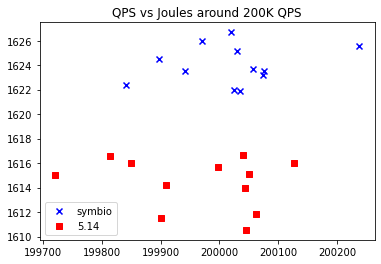

In [23]:
def plot_by_QPS(loc1, loc2, qps):
    df1 = sorted_df(symbio_location,qps)
    df2 = sorted_df(linux_location,qps)
    qps1 = df1['measure_QPS'].tolist()
    joules1 = df1['joules'].tolist()
    qps2 = df2['measure_QPS'].tolist()
    joules2 = df2['joules'].tolist()
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(qps1,joules1, c='b', marker='x', label='symbio')
    ax1.scatter(qps2,joules2, c='r', marker='s', label='5.14')
    plt.legend(loc='lower left')
    plt.title('QPS vs Joules around ' + str(int(qps/1000))+ 'K QPS')
    plt.show()
    

plot_by_QPS(symbio_location, linux_location, qps_list[0])   

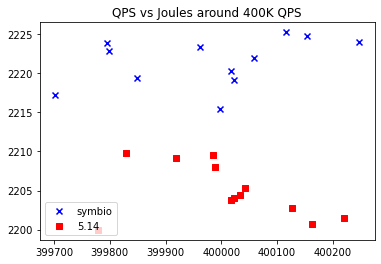

In [24]:
plot_by_QPS(symbio_location, linux_location, qps_list[1]) 

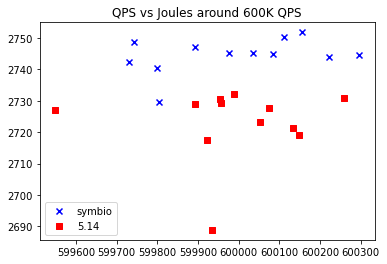

In [25]:
plot_by_QPS(symbio_location, linux_location, qps_list[2]) 

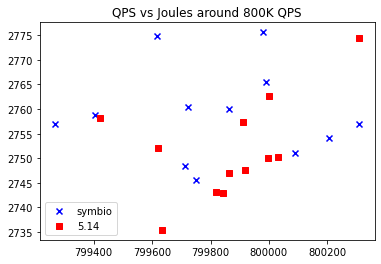

In [26]:
plot_by_QPS(symbio_location, linux_location, qps_list[3]) 

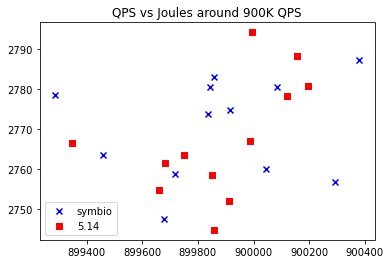

In [27]:
plot_by_QPS(symbio_location, linux_location, qps_list[4]) 

QPS vs Joules around 1000K QPS


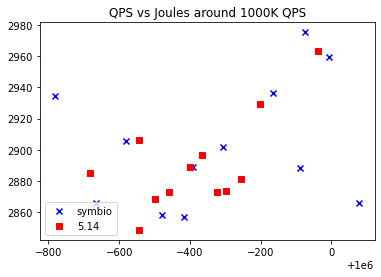

In [28]:
print ('QPS vs Joules around ' + str(int(qps_list[5]/1000))+ 'K QPS')
plot_by_QPS(symbio_location, linux_location, qps_list[5]) 

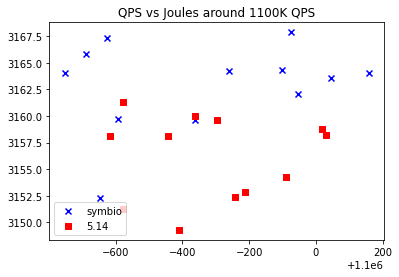

In [29]:
plot_by_QPS(symbio_location, linux_location, qps_list[6]) 

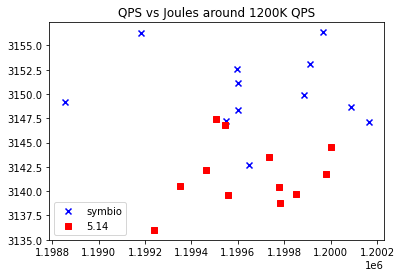

In [30]:
plot_by_QPS(symbio_location, linux_location, qps_list[7]) 

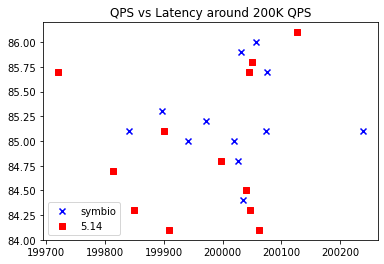

In [31]:
def plot_by_latency(loc1, loc2, qps):
    df1 = sorted_df(symbio_location,qps)
    df2 = sorted_df(linux_location,qps)
    qps1 = df1['measure_QPS'].tolist()
    latency1 = df1['read_99th'].tolist()
    qps2 = df2['measure_QPS'].tolist()
    latency2 = df2['read_99th'].tolist()
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.scatter(qps1,latency1, c='b', marker='x', label='symbio')
    ax1.scatter(qps2,latency2, c='r', marker='s', label='5.14')
    plt.legend(loc='lower left')
    plt.title ('QPS vs Latency around ' + str(int(qps/1000))+ 'K QPS')
    plt.show()
    
plot_by_latency(symbio_location, linux_location, qps_list[0]) 

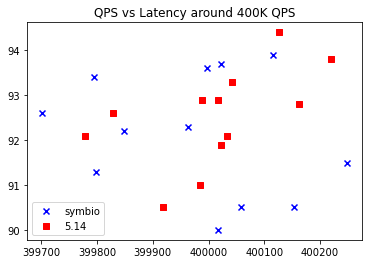

In [32]:
plot_by_latency(symbio_location, linux_location, qps_list[1]) 

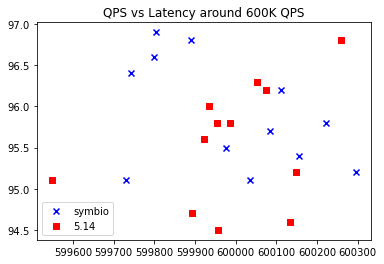

In [33]:
plot_by_latency(symbio_location, linux_location, qps_list[2]) 

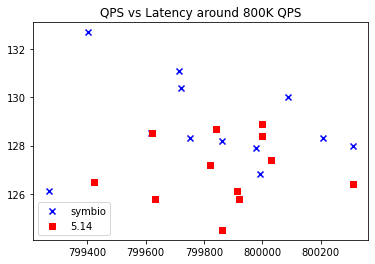

In [34]:
plot_by_latency(symbio_location, linux_location, qps_list[3]) 

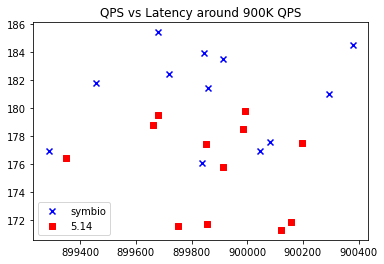

In [35]:
plot_by_latency(symbio_location, linux_location, qps_list[4]) 

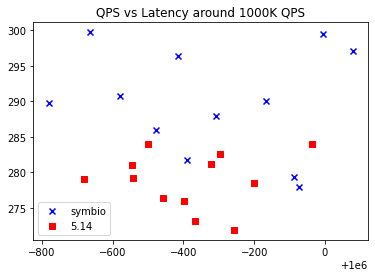

In [36]:
plot_by_latency(symbio_location, linux_location, qps_list[5]) 

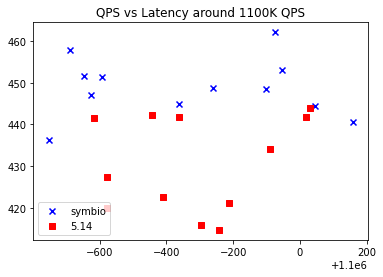

In [37]:
plot_by_latency(symbio_location, linux_location, qps_list[6]) 